# Smartphone can know what you are doing!
### author: Xiuyu Hong  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import bqplot
import numpy as np
import ipywidgets

Nowadays, we almost cannot live without our smartphone. We may think we know our smartphone well. But do you know how much your smartphone know about you? There was [an experiment](http://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones) conducted on 30 volunteers that may give us a rough idea of the answer to the question. In this blog, we will explore the dataset together and see whether our smartphones know our activities.

Dataset Reference: http://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

In [2]:
# read in preprocessed data, saved to CSV last time
data = pd.read_csv('uci_har.csv')
data = data.astype({'label':'int'})
data = data[data.columns[1:]]

In [3]:
# read label names from file 
label_name = []
with open('UCI HAR Dataset/activity_labels.txt') as f:
    line = 'init'
    while line:
        line = f.readline().strip()
        if len(line) > 0:
            label_name.append(line.split()[1])

Let's first look at what labels do we have in this dataset. And how are they distributed. From the plot, we can see that there are 6 labels:
```
 'WALKING',
 'WALKING_UPSTAIRS',
 'WALKING_DOWNSTAIRS',
 'SITTING',
 'STANDING',
 'LAYING'
```
The labels are distributed evenly in the dataset. Looks like our volunteers are living a healthy life!

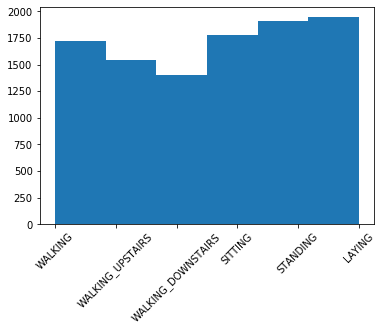

In [4]:
plt.hist(data.label,bins=6)
plt.xticks([1,2,3,4,5,6], label_name, rotation = 45)
plt.show()

In [5]:
# remove the first column from users' option
feature_names = data.columns

In [6]:
feature_names = feature_names[:10]

In [7]:
# make a color map
categories = np.unique(data['label'])
colors = ['#FA8072', '#800000', '#ADD8E6', '#228B22', '#FFFF00', '#800080']
colordict = dict(zip(categories, colors))  

In [8]:
# attach the color map to the dataframe
data["Color"] = data['label'].apply(lambda x: colordict[x])

In [9]:
# (1) scales
x_scl = bqplot.LinearScale() 
y_scl = bqplot.LinearScale()

# (2) Axis
ax_xcl = bqplot.Axis(label='X axis', scale=x_scl)
ax_ycl = bqplot.Axis(label='Y axis', scale=y_scl, orientation='vertical', side='left')

# (3) Marks
i,j = 0,0
x_name = feature_names[j]
y_name = feature_names[i]

activity_scatt = bqplot.Scatter(x = data[x_name],
                               y = data[y_name], 
                                colors = data.Color.values.tolist(),
                              scales={'x':x_scl, 'y':y_scl})

In [10]:
cor_matrix = data[feature_names].corr()

In [11]:
# (1) scales - colors, x & y
col_sc = bqplot.ColorScale(scheme="RdPu", 
                           min=np.nanmin(cor_matrix), 
                           max=np.nanmax(cor_matrix))
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

# (2) create axis - for colors, x & y
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')

x_ax = bqplot.Axis(scale = x_sc, label='X Axis')
y_ax = bqplot.Axis(scale = y_sc, orientation = 'vertical', label = 'Y Axis')

# (3) Marks
heat_map = bqplot.GridHeatMap(color = cor_matrix,
                              row = feature_names, 
                              column = feature_names,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'},
                              anchor_style = {'fill':'blue'}, 
                              selected_style = {'opacity': 1.0},
                              unselected_style = {'opacity': 1.0})

In [12]:
myInfoLabel = ipywidgets.Label()
v = v = cor_matrix[x_name][y_name]
myInfoLabel.value = 'X axis is {}, y axis is {}, their correlation is {}'.format(x_name, y_name, v)

In [13]:
def get_data_value(change):
    if len(change['owner'].selected) == 1: #only 1 selected
        i,j = change['owner'].selected[0] 
        x_name = feature_names[j]
        y_name = feature_names[i]
        v = cor_matrix[x_name][y_name]
        myInfoLabel.value = 'X axis is {}, y axis is {}, their correlation is {}'.format(x_name, y_name, v)
        activity_scatt.x = data[x_name]
        activity_scatt.y = data[y_name]
        
heat_map.observe(get_data_value, 'selected')

In [14]:
# (5) create figures
fig_heatmap = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
fig_dur = bqplot.Figure(marks = [activity_scatt], axes = [ax_xcl, ax_ycl])

Here we will show an interactive plot of how two of all these features can tell what we are doing.   
  
  The left part shows how related the two features are. The deeper the color, the more related they are.   
    
If you click on the cell, you can see how the labels are separated with these two features. 

In [15]:
fig_heatmap.layout.min_width='500px'
fig_dur.layout.min_width='500px'

myDashboard = ipywidgets.VBox([myInfoLabel, ipywidgets.HBox([fig_heatmap,fig_dur])])
myDashboard

Now, we had an idea of what effect do the features have separately on the prediction. We can look into how they perform together.   
  
  In the following plot, each point is a sample. They are colored with the label they are corresponding to. The axis are some transformation of all the features. From this plot, we can conclude that the smartphone can tell at least whether we are laying or not!

![](context.png)

Reference: https://www.kaggle.com/morrisb/what-does-your-smartphone-know-about-you